In [3]:
# https://medium.com/unpackai/how-to-deploy-fast-ai-models-8704ea711ad2
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *

In [5]:
from fastai.vision.all import *

In [6]:
# import pathlib
# pathlib.Path().absolute()

Path('C:/fastai/rooms2')

In [7]:
# import os
# os.chdir('C:/fastai/rooms2') 
# %ls

 Volume in drive C is OS
 Volume Serial Number is 7E01-1132

 Directory of C:\fastai\rooms2

19/05/2021  02:27 pm    <DIR>          .
19/05/2021  02:27 pm    <DIR>          ..
18/05/2021  04:04 pm    <DIR>          .ipynb_checkpoints
19/05/2021  02:27 pm            11,856 001_bathrooms.ipynb
18/05/2021  05:30 pm            11,253 001_rooms.ipynb
18/05/2021  04:45 pm    <DIR>          bathroom
11/05/2021  04:15 pm        39,038,622 bathroom.zip
19/05/2021  02:02 pm    <DIR>          models
18/05/2021  04:34 pm    <DIR>          rooms
12/05/2021  04:45 pm       121,902,764 rooms.zip
               4 File(s)    160,964,495 bytes
               6 Dir(s)   6,433,492,992 bytes free


In [2]:
# import zipfile
# zip = zipfile.ZipFile('bathroom.zip')
# zip.extractall('bathroom')
# zip.close()

In [8]:
path = 'C:/fastai/rooms2/bathroom'

In [9]:
files = get_image_files('C:/fastai/rooms2/bathroom')
len(files)

1854

In [10]:
import re
def is_bath(x): 
    if re.search("bath", x):
        return True
    else:
        return False

is_bath('bath_room')

True

In [ ]:
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#     label_func=is_bath, item_tfms=Resize(224))

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(4)

In [ ]:
# learn.export('trained_model.pkl') #export learner

In [ ]:
# uploader = widgets.FileUpload()
# uploader

FileUpload(value={}, description='Upload')

In [ ]:
# os.chdir('/notebooks/test') 
# %ls

# uploader = SimpleNamespace(data = ['tub_29.jpg'])
# uploader = SimpleNamespace(data = ['tub_30.jpg'])

aj.jpg       test_2.jpg   tub (5).jpg  tub_20.jpeg  tub_25.jpg  tub_30.jpg
bedroom.jpg  tub (1).jpg  tub (6).jpg  tub_21.jpg   tub_26.jpg
cheval.jpg   tub (2).jpg  tub (7).jpg  tub_22.jpg   tub_27.jpg
test.jpg     tub (3).jpg  tub (8).jpg  tub_23.jpg   tub_28.jpg
test_1.jpg   tub (4).jpg  tub (9).jpg  tub_24.jpg   tub_29.jpg


In [ ]:
# img = PILImage.create(uploader.data[0])
# # img.to_thumb(192)

# is_bath,_,probs = learn.predict(img)
# print(f"Is this a bathroom?: {is_bath}.")
# print(f"Probability it's a bathroom: {probs[1].item():.6f}")

In [11]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath


#     learn = load_learner('C:/fastai/rooms2/models', 'trained_model.pkl')
learn = load_learner('C:/fastai/rooms2/models/trained_model.pkl')
# classes = learn.data.classes

In [1]:
# import ipywidgets
# print(ipywidgets.__version__)
# !pip install ipywidgets==7.5.1
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

7.5.1


Button(description='Is it a bathroom?', style=ButtonStyle())

Button(description='Show image', style=ButtonStyle())

Button(description='reset uploader', style=ButtonStyle())

FileUpload(value={}, description='Upload')

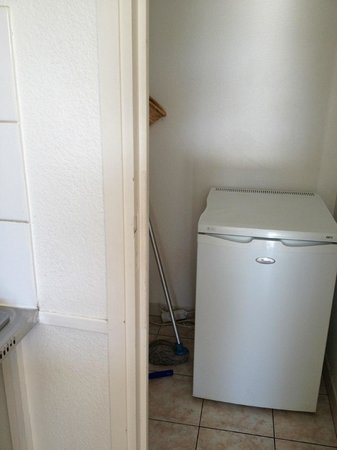

is this a bathroom?: True.


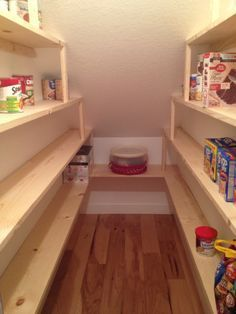

is this a bathroom?: True.


is this a bathroom?: False.


In [16]:
# TEST WIDGET
import ipywidgets as widgets
from IPython.display import clear_output

uploader = widgets.FileUpload()

btn = widgets.Button(description='Is it a bathroom?')
display(btn)

btn2 = widgets.Button(description='Show image')
display(btn2)

btn3 = widgets.Button(description='reset uploader')
display(btn3)

#-------------------------------------------

def btn_showimage(obj):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)

def btn_eventhandler(obj):
    img = PILImage.create(uploader.data[0])
    wh_room,_,probs = learn.predict(img)
    print(f"is this a bathroom?: {wh_room}.")
    
def btn_reset(obj): 
    uploader.value.clear()
    uploader._counter = 0

#-------------------------------------------
    
btn2.on_click(btn_showimage)
display(uploader)
btn.on_click(btn_eventhandler)
btn3.on_click(btn_reset)

# TEST WIDGET